# Problem 1 : Merton's portfolio

 ### Continuous time finite state space
- State : $(t,W_{t})$ with $t \in [0,T]$
- Action : $(\pi_{t}, c_{t})$ with $c_{t} \in [0,W_{t}]$
- Reward per unit time :  $U(c_t) = \frac{c_t^{1-\gamma}}{1-\gamma}$ for $t <T$, and $\frac{B(T) W_T^{1-\gamma}}{1-\gamma}$ with $B(\cdot)$ the bequest function.
- Discount factor : $\rho$
- Return: accumulated discounted Reward : 
    $$\boxed{V(t,W_t) = \mathbb{E}[\int_{t}^T \frac{e^{-\rho(s-t)}c_s^{1-\gamma}}{1-\gamma} ds +\frac{e^{-\rho (T-t)} B(T) W_T^{1-\gamma}}{1-\gamma}|W_t]}$$. 
- Obj: Find Policy $(t,W_t) \rightarrow [\pi_t , c_t]$ that maximizes the Expected Return : 
    $$V^{\ast}(t,W_t) = \max_{\pi_t, c_t}\mathbb{E}[\int_{t}^T \frac{e^{-\rho s}  c_s^{1-\gamma}}{1-\gamma} ds +\frac{e^{-\rho T} B(T) W_T^{1-\gamma}}{1-\gamma}|W_t]$$
- Bellman Equation:,
    $$V^{\ast}(t,W_t) = \max_{\pi_t, c_t}\mathbb{E}[\int_{t}^{t_1} \frac{e^{-\rho s} c_s^{1-\gamma}}{1-\gamma} ds +V^{\ast}(t_1,W_{t_1})]$$,
    i.e.
   $$0 = \max_{\pi_t, c_t}\mathbb{E}[dV^{\ast}(t,W_t) + \frac{e^{-\rho t} c_t^{1-\gamma}}{1-\gamma}]$$,
    i.e.
    $$\max_{\pi_t, c_t}\Phi(t,W_t; \pi_t, c_t) = 0$$
    which leads to (two partial derivatives + function = 0):
    $$\pi_t^{\ast} = \frac{\mu-r}{\sigma^2 \gamma}$$
    $$c_t^{\ast} = \frac{\nu W_t}{1+ (\nu \epsilon -1) e^{-\nu(T-t)}}, \nu \neq 0$$
    $$c_t^{\ast} = \frac{W_t}{T-t+\epsilon}, \nu = 0$$
    $$\nu = \frac{\rho - (1-\gamma)(\frac{(\mu-r)^2}{2\sigma^2 \gamma}) + r}{\gamma}$$

 ### Discrete time finite state space
- The State $(t,\bar{W}_t)$
- Discrete time, $t =[0,1,2,...,T]$
- Discrete wealth, $\bar{W}_t = round(W_t, 0.001) | W_0 = 1$, where $W_t$ is the real wealth,
    $\bar{W}_t = [0,0.001,0.002,...,10]$
- The Action $[\pi_t , c_t], \pi_t \in [0,0.1,0.2,...1], c_t \in [0,0.001,0.002,...W_t]$ (Note here I put constraint on $\pi_t$)
 $$\boxed{\bar{W}_{t+1} = \bar{W}_t + (1-\pi_t)R^{rf} + \pi_t R^{s}_t - c_t;\quad  W_0 = 1}$$
 where $R^{rf}$ $R^{s}_t$ are discrete numbers $n*0.01$, $n \in \mathbb{N}$,
- Reward per unit time :  $U(c_t) = \frac{c_t^{1-\gamma}}{1-\gamma}$ for $t <T$, and $\frac{B(T) W_T^{1-\gamma}}{1-\gamma}$
- Discount factor: $\rho$.
- Return (accumulated discounted Reward) : 
 $$\boxed{V(t,W_t) = \mathbb{E}[\sum_{s =0}^{T-1}\frac{c_s^{1-\gamma}}{(1-\gamma)(1+\rho)^s} ds +\frac{B(T) W_T^{1-\gamma}}{(1-\gamma)(1+\rho)^T}|W_t]}$$
- Goal: Find Policy $(t,W_t) \rightarrow [\pi_t , c_t]$ that maximizes the Expected Return.

In [21]:
# Import modules and packages
import matplotlib.pyplot as plt
import numpy as np
import random


We discretize $[0,1]$ such that :  $t_{i} = \frac{i}{T}$ for $i \in \{0,\dots,T\}$

In [55]:
# Parameters 
T = 100 
step = 1/T
time = np.array([i/T for i in range(T)], dtype = float)
mu = 0
sigma = 1 
r = 1
rho = 1
gamma = 0.5
epsilon = 0.001

# Functions
def bequel(t) : 
    return epsilon**gamma

def utility(c,t) :
    if t<T : 
        return c**(1-gamma)/(1-gamma)
    else : 
        return B(T)*W_T**(1-gamma)/(1-gamma)
    
def riskless_asset(t) : 
    return np.exp(r*t)

def risky_asset(t,B) : 
    return np.exp((mu - (sigma**2)/2)*t + sigma*B)
    

# Initialization 
W_0 = 1 

In order to generate $\hat{W}$, we first generate $B_{i+\frac{1}{T}}-B_{i} \sim \mathcal{N}(0,\frac{1}{T})$ so we can simulate $(B_{0}, \ldots, B_{T})$.

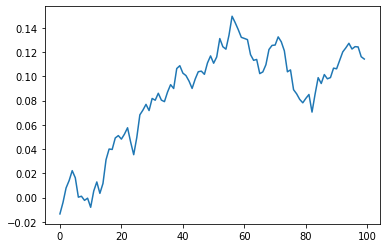

In [78]:
# Generate Borwnian Motion
delta_BM = np.random.normal(mu,step,100)
B = np.cumsum(delta_BM) 
plt.plot(B)
plt.show()

In [79]:
# Generate Riskless Asset
R = riskless_asset(time)

# Generate Risky Asset
S = risky_asset(time,B
plt.plot(risky_asset(time,B))
plt.show()

# Generate wealth variable